# Example joint fit between GBM and Swift BAT

One of the key features of 3ML is the abil ity to fit multi-messenger data properly. A simple example of this is the joint fitting of two instruments whose data obey different likelihoods. Here, we have GBM data which obey a Poisson-Gaussian profile likelihoog (<a href=http://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/manual/node293.html> PGSTAT</a> in XSPEC lingo) and Swift BAT which data which are the result of a "fit" via a coded mask and hence obey a Gaussian ( $\chi^2$ ) likelihood.


In [1]:
import warnings

warnings.simplefilter("ignore")
import numpy as np

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
%%capture
import matplotlib.pyplot as plt

np.random.seed(12345)
from threeML import *
from threeML.io.package_data import get_path_of_data_file
from threeML.io.logging import silence_console_log

In [3]:
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
set_threeML_style()
silence_warnings()

## Plugin setup

We have data from the same time interval from Swift BAT and a GBM NAI and BGO detector. We have preprocessed GBM data to so that it is OGIP compliant. (Remember that we can handle the raw data with the TimeSeriesBuilder). Thus, we will use the OGIPLike plugin to read in each dataset, make energy selections and examine the raw count spectra.


### Swift BAT

03:44:34 INFO      Auto-probed noise models:                                                    ]8;id=294676;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=691737;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#484\484]8;;\

         INFO      - observation: gaussian                                                      ]8;id=683736;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=389616;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#485\485]8;;\

         INFO      - background: None                                                           ]8;id=576680;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=150308;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#486\486]8;;\

         INFO      Range 15-150 translates to channels 3-62                                    ]8;id=888681;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=747976;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#1241\1241]8;;\

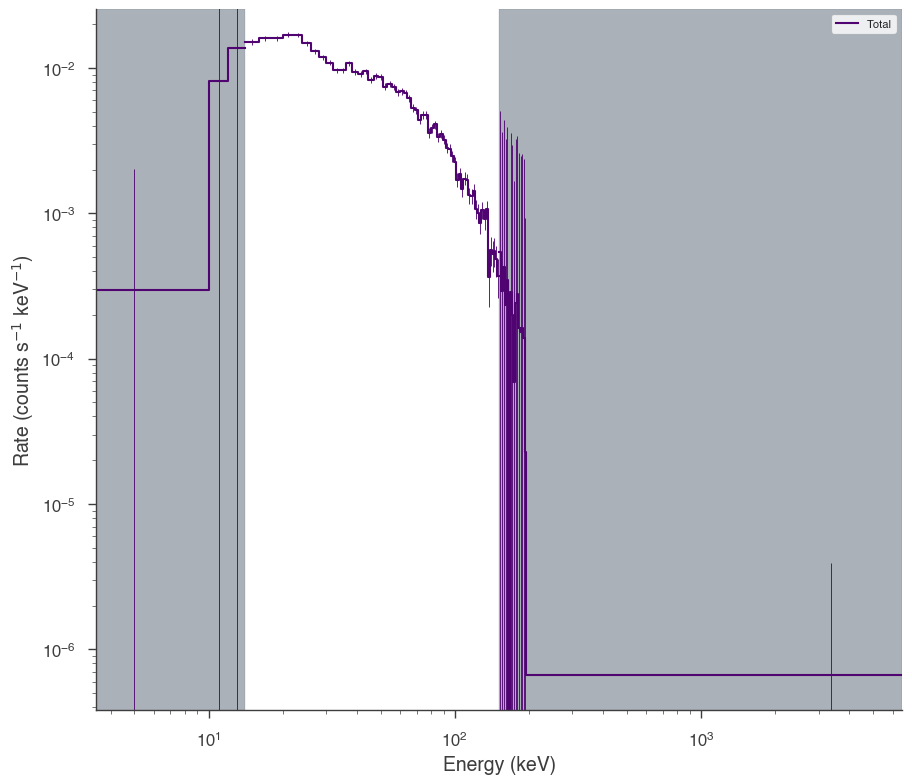

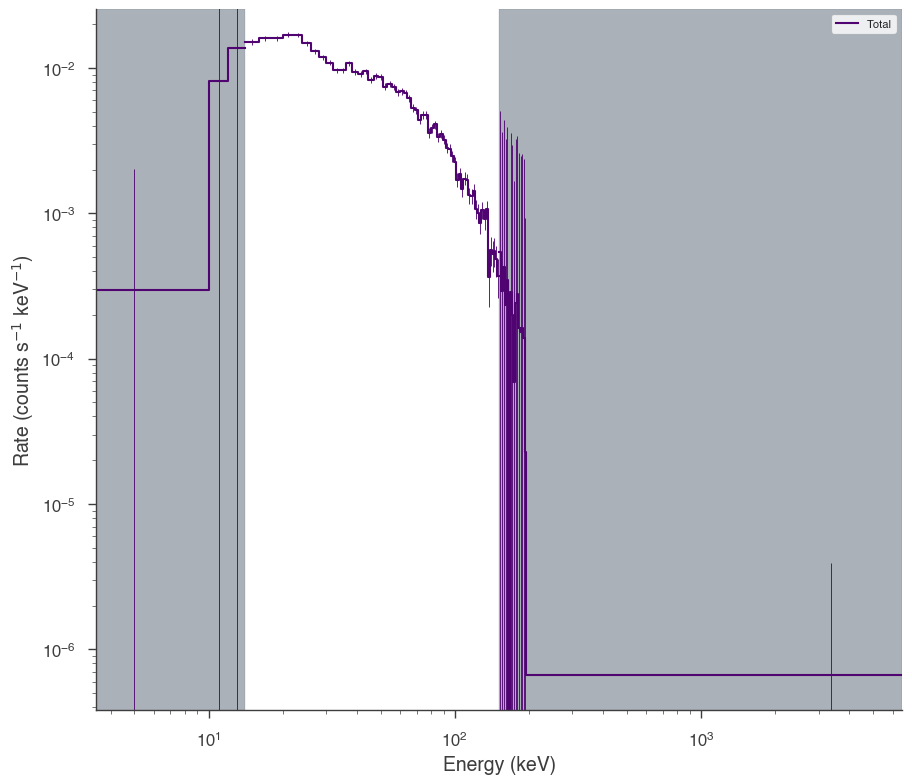

In [4]:
bat_pha = get_path_of_data_file("datasets/bat/gbm_bat_joint_BAT.pha")
bat_rsp = get_path_of_data_file("datasets/bat/gbm_bat_joint_BAT.rsp")

bat = OGIPLike("BAT", observation=bat_pha, response=bat_rsp)

bat.set_active_measurements("15-150")
bat.view_count_spectrum()

### Fermi GBM

03:44:36 INFO      Auto-probed noise models:                                                    ]8;id=529664;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=558857;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#484\484]8;;\

         INFO      - observation: poisson                                                       ]8;id=547687;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=980257;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#485\485]8;;\

         INFO      - background: gaussian                                                       ]8;id=538655;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=782160;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#486\486]8;;\

         INFO      Range 8-900 translates to channels 2-124                                    ]8;id=759122;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=678618;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#1241\1241]8;;\

         INFO      Auto-probed noise models:                                                    ]8;id=807622;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=581610;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#484\484]8;;\

         INFO      - observation: poisson                                                       ]8;id=329783;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=815325;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#485\485]8;;\

         INFO      - background: gaussian                                                       ]8;id=455117;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=328610;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#486\486]8;;\

         INFO      Range 250-30000 translates to channels 1-119                                ]8;id=552985;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=486729;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#1241\1241]8;;\

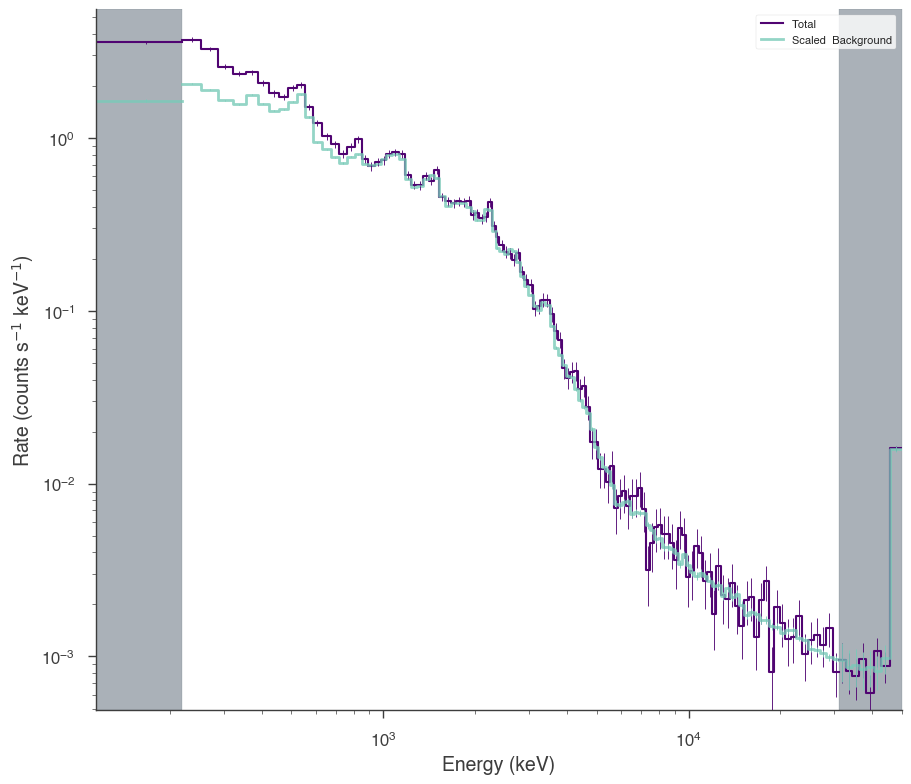

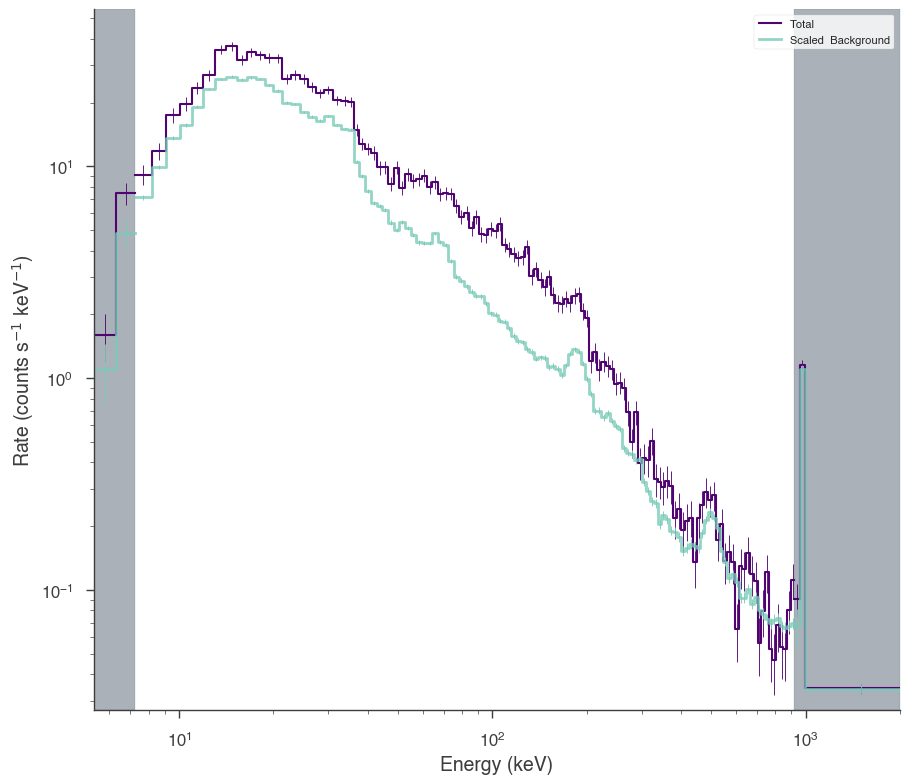

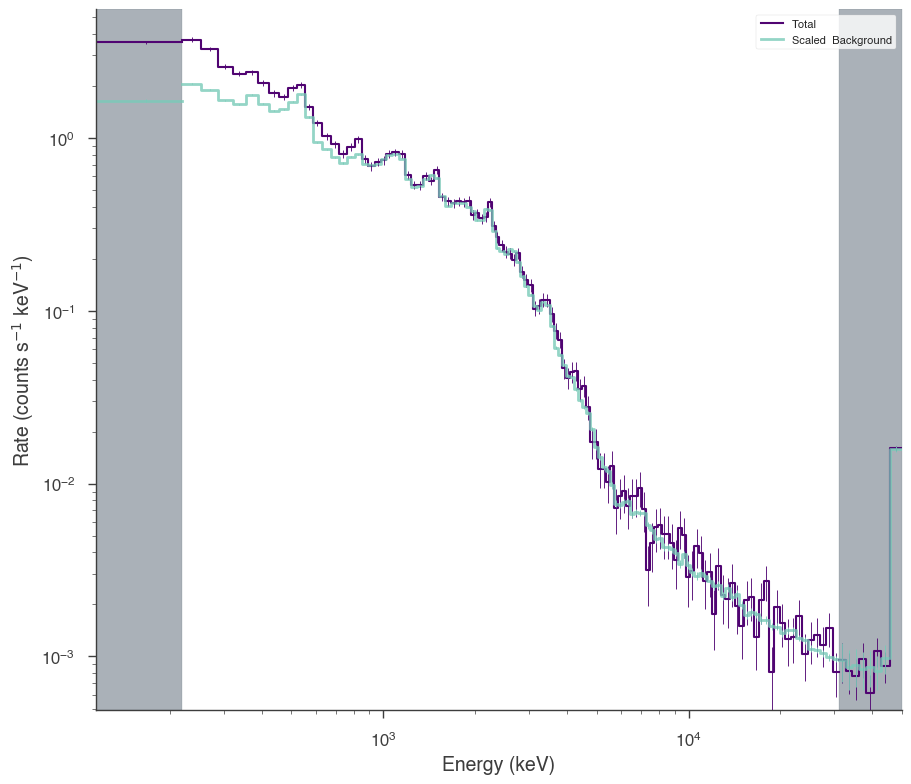

In [5]:
nai6 = OGIPLike(
    "n6",
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_NAI_06.pha"),
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_NAI_06.bak"),
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_NAI_06.rsp"),
    spectrum_number=1,
)


nai6.set_active_measurements("8-900")
nai6.view_count_spectrum()

bgo0 = OGIPLike(
    "b0",
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_BGO_00.pha"),
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_BGO_00.bak"),
    get_path_of_data_file("datasets/gbm/gbm_bat_joint_BGO_00.rsp"),
    spectrum_number=1,
)

bgo0.set_active_measurements("250-30000")
bgo0.view_count_spectrum()

## Model setup

We setup up or spectrum and likelihood model and combine the data. 3ML will automatically assign the proper likelihood to each data set. At first, we will assume a perfect calibration between the different detectors and not a apply a so-called effective area correction.

In [6]:
band = Band()

model_no_eac = Model(PointSource("joint_fit_no_eac", 0, 0, spectral_shape=band))

## Spectral fitting

Now we simply fit the data by building the data list, creating the joint likelihood and running the fit.

### No effective area correction

In [7]:
data_list = DataList(bat, nai6, bgo0)

jl_no_eac = JointLikelihood(model_no_eac, data_list)

jl_no_eac.fit()

03:44:39 INFO      set the minimizer to minuit                                             ]8;id=659101;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=422020;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

Best fit values:

,result,unit
parameter,,
joint_fit_no_eac.spectrum.main.Band.K,(2.75 +/- 0.06) x 10^-2,1 / (cm2 keV s)
joint_fit_no_eac.spectrum.main.Band.alpha,-1.029 +/- 0.017,
joint_fit_no_eac.spectrum.main.Band.xp,(5.7 +/- 0.4) x 10^2,keV
joint_fit_no_eac.spectrum.main.Band.beta,-2.41 +/- 0.18,


Correlation matrix:

1.00,0.90,-0.85,0.14
0.90,1.00,-0.73,0.08
-0.85,-0.73,1.00,-0.32
0.14,0.08,-0.32,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
BAT,53.029633
b0,553.075452
n6,761.186043
total,1367.291128


Values of statistical measures:

,statistical measures
AIC,2742.716936
BIC,2757.423964


(                                                value  negative_error  \
 joint_fit_no_eac.spectrum.main.Band.K        0.027470       -0.000556   
 joint_fit_no_eac.spectrum.main.Band.alpha   -1.029232       -0.016652   
 joint_fit_no_eac.spectrum.main.Band.xp     567.749536      -37.865460   
 joint_fit_no_eac.spectrum.main.Band.beta    -2.409249       -0.178109   
 
                                            positive_error      error  \
 joint_fit_no_eac.spectrum.main.Band.K            0.000581   0.000568   
 joint_fit_no_eac.spectrum.main.Band.alpha        0.016918   0.016785   
 joint_fit_no_eac.spectrum.main.Band.xp          34.841594  36.353527   
 joint_fit_no_eac.spectrum.main.Band.beta         0.185475   0.181792   
 
                                                       unit  
 joint_fit_no_eac.spectrum.main.Band.K      1 / (cm2 keV s)  
 joint_fit_no_eac.spectrum.main.Band.alpha                   
 joint_fit_no_eac.spectrum.main.Band.xp                 keV  
 joint_fit_no

The fit has resulted in a very typical Band function fit. Let's look in count space at how good of a fit we have obtained.


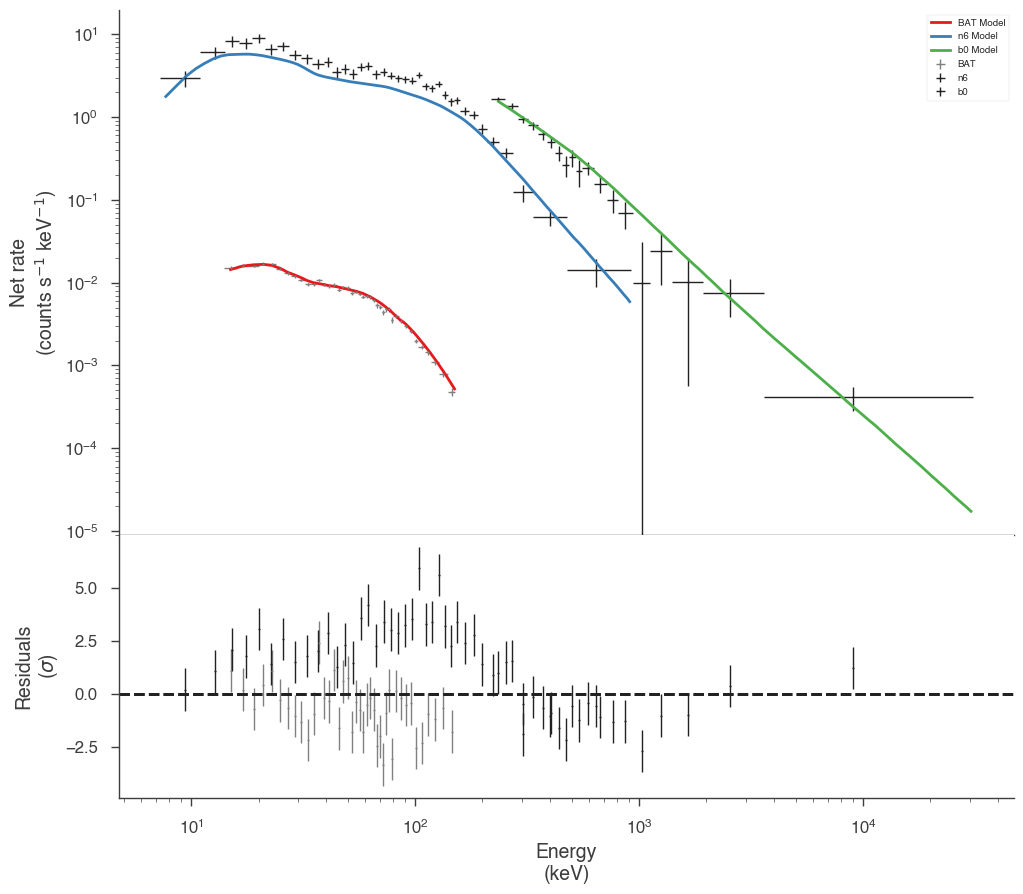

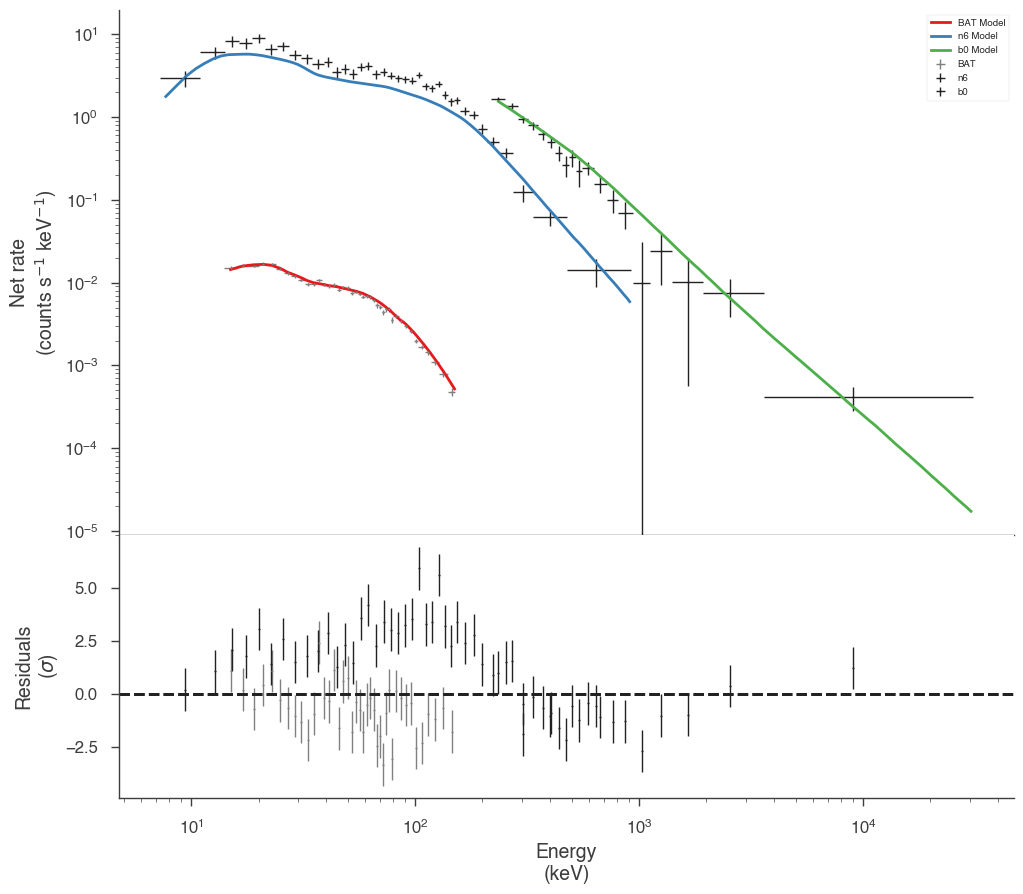

In [8]:
threeML_config.plugins.ogip.fit_plot.model_cmap = "Set1"
threeML_config.plugins.ogip.fit_plot.n_colors = 3
display_spectrum_model_counts(
    jl_no_eac,
    min_rate=[0.01, 10.0, 10.0],
    data_colors=["grey", "k", "k"],
    show_background=False,
    source_only=True,
)

It seems that the effective areas between GBM and BAT do not agree! We can look at the goodness of fit for the various data sets.

In [9]:
gof_object = GoodnessOfFit(jl_no_eac)

gof, res_frame, lh_frame = gof_object.by_mc(n_iterations=100)

Goodness of fit computation:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
import pandas as pd

pd.Series(gof)

total    0.00
BAT      0.00
n6       0.00
b0       0.57
dtype: float64

Both the GBM NaI detector and Swift BAT exhibit poor GOF.

### With effective are correction

Now let's add an effective area correction between the detectors to see if this fixes the problem. The effective area is a nuissance parameter that attempts to model systematic problems in a instruments calibration. It simply scales the counts of an instrument by a multiplicative factor. It cannot handle more complicated energy dependent

In [11]:
# turn on the effective area correction and set it's bounds
nai6.use_effective_area_correction(0.2, 1.8)
bgo0.use_effective_area_correction(0.2, 1.8)

model_eac = Model(PointSource("joint_fit_eac", 0, 0, spectral_shape=band))

jl_eac = JointLikelihood(model_eac, data_list)

jl_eac.fit()

03:45:20 INFO      n6 is using effective area correction (between 0.2 and 1.8)                 ]8;id=812321;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=998345;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#2273\2273]8;;\

         INFO      b0 is using effective area correction (between 0.2 and 1.8)                 ]8;id=728249;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py\SpectrumLike.py]8;;\:]8;id=684363;file:///Users/runner/work/threeML/threeML/threeML/plugins/SpectrumLike.py#2273\2273]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=603581;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=88102;file:///Users/runner/work/threeML/threeML/threeML/classicMLE/joint_likelihood.py#1043\1043]8;;\

Best fit values:

,result,unit
parameter,,
joint_fit_eac.spectrum.main.Band.K,(2.98 +/- 0.12) x 10^-2,1 / (cm2 keV s)
joint_fit_eac.spectrum.main.Band.alpha,(-9.84 +/- 0.26) x 10^-1,
joint_fit_eac.spectrum.main.Band.xp,(3.31 +/- 0.32) x 10^2,keV
joint_fit_eac.spectrum.main.Band.beta,-2.36 +/- 0.15,
cons_n6,1.56 +/- 0.04,
cons_b0,1.41 +/- 0.10,


Correlation matrix:

1.00,0.95,-0.92,0.31,0.29,0.62
0.95,1.00,-0.83,0.26,0.26,0.52
-0.92,-0.83,1.00,-0.36,-0.45,-0.77
0.31,0.26,-0.36,1.00,0.04,-0.03
0.29,0.26,-0.45,0.04,1.00,0.47
0.62,0.52,-0.77,-0.03,0.47,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
BAT,40.079996
b0,544.747536
n6,644.704629
total,1229.532162


Values of statistical measures:

,statistical measures
AIC,2471.349069
BIC,2493.326885


(                                             value  negative_error  \
 joint_fit_eac.spectrum.main.Band.K        0.029815       -0.001164   
 joint_fit_eac.spectrum.main.Band.alpha   -0.983897       -0.026363   
 joint_fit_eac.spectrum.main.Band.xp     330.850383      -31.907748   
 joint_fit_eac.spectrum.main.Band.beta    -2.357720       -0.152347   
 cons_n6                                   1.562901       -0.036983   
 cons_b0                                   1.408638       -0.093890   
 
                                         positive_error      error  \
 joint_fit_eac.spectrum.main.Band.K            0.001172   0.001168   
 joint_fit_eac.spectrum.main.Band.alpha        0.025951   0.026157   
 joint_fit_eac.spectrum.main.Band.xp          31.067853  31.487801   
 joint_fit_eac.spectrum.main.Band.beta         0.154181   0.153264   
 cons_n6                                       0.039064   0.038024   
 cons_b0                                       0.098322   0.096106   
 
         

Now we have a much better fit to all data sets

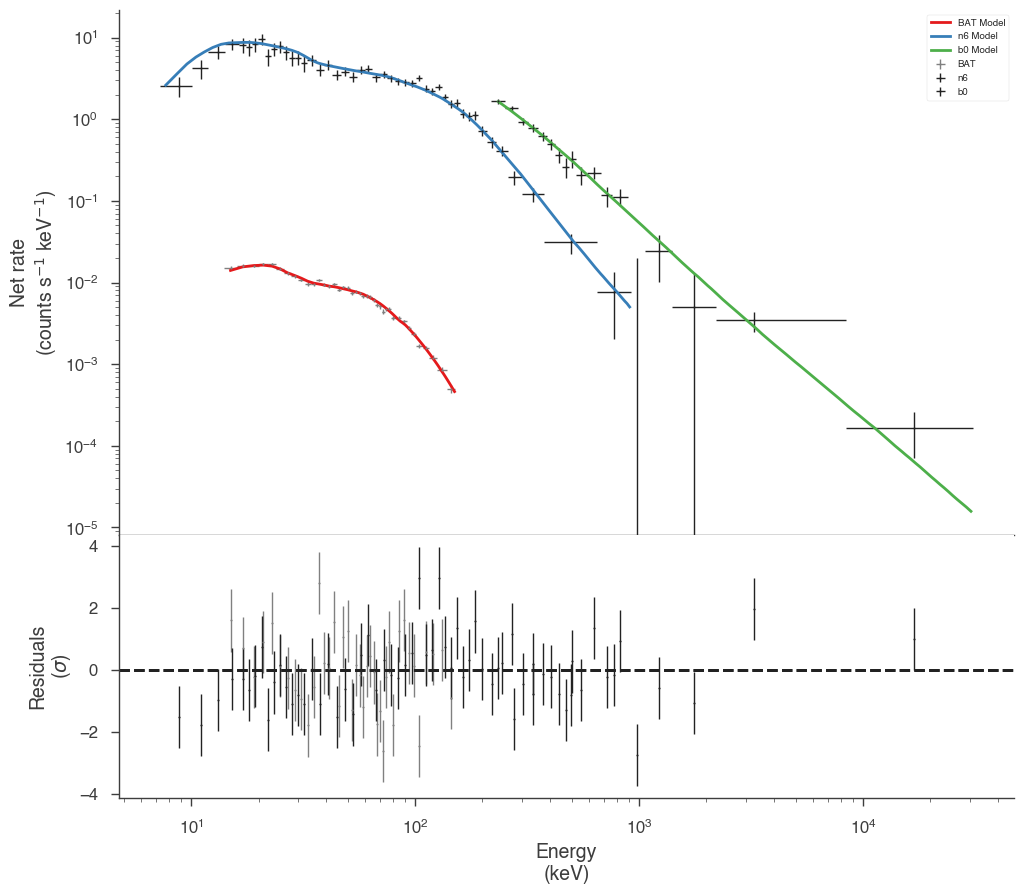

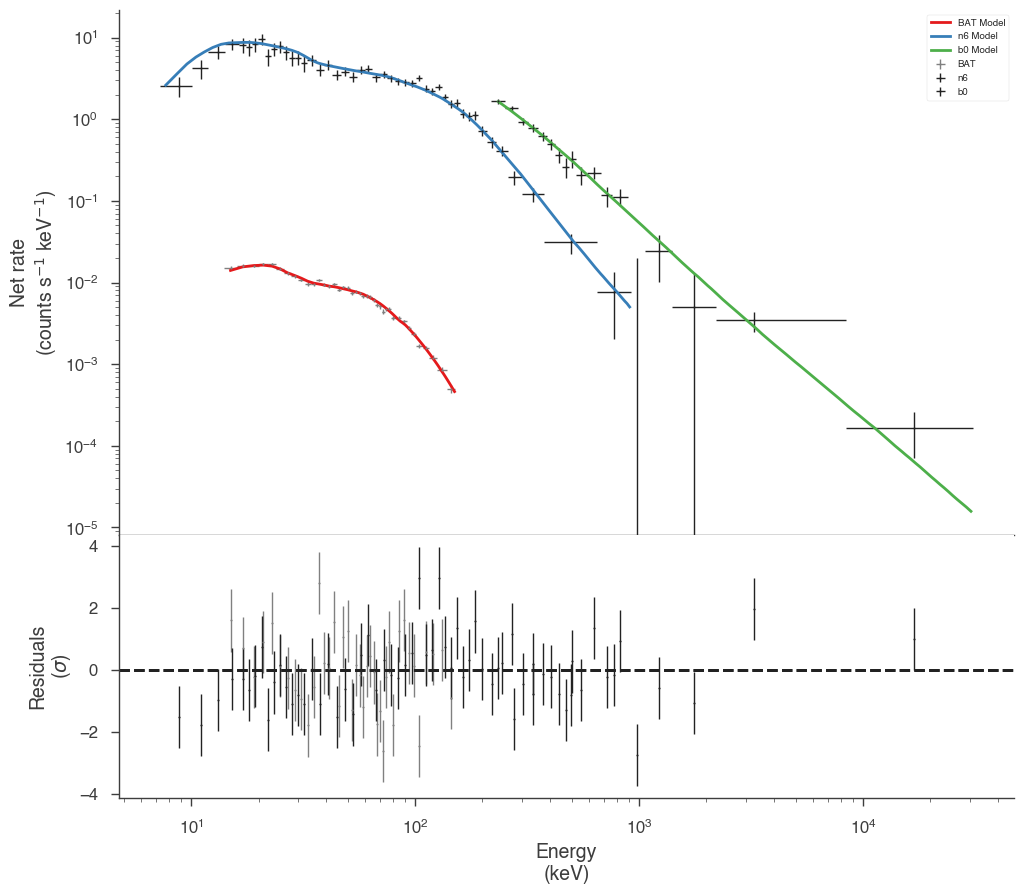

In [12]:
display_spectrum_model_counts(
    jl_eac, step=False, min_rate=[0.01, 10.0, 10.0], data_colors=["grey", "k", "k"]
)

In [13]:
gof_object = GoodnessOfFit(jl_eac)

# for display purposes we are keeping the output clear
# with silence_console_log(and_progress_bars=False):
gof, res_frame, lh_frame = gof_object.by_mc(n_iterations=100, continue_on_failure=True)

Goodness of fit computation:   0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
import pandas as pd

pd.Series(gof)

total    0.13
BAT      0.07
n6       0.13
b0       0.12
dtype: float64

## Examining the differences

Let's plot the fits in model space and see how different the resulting models are.


processing MLE analyses:   0%|          | 0/2 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

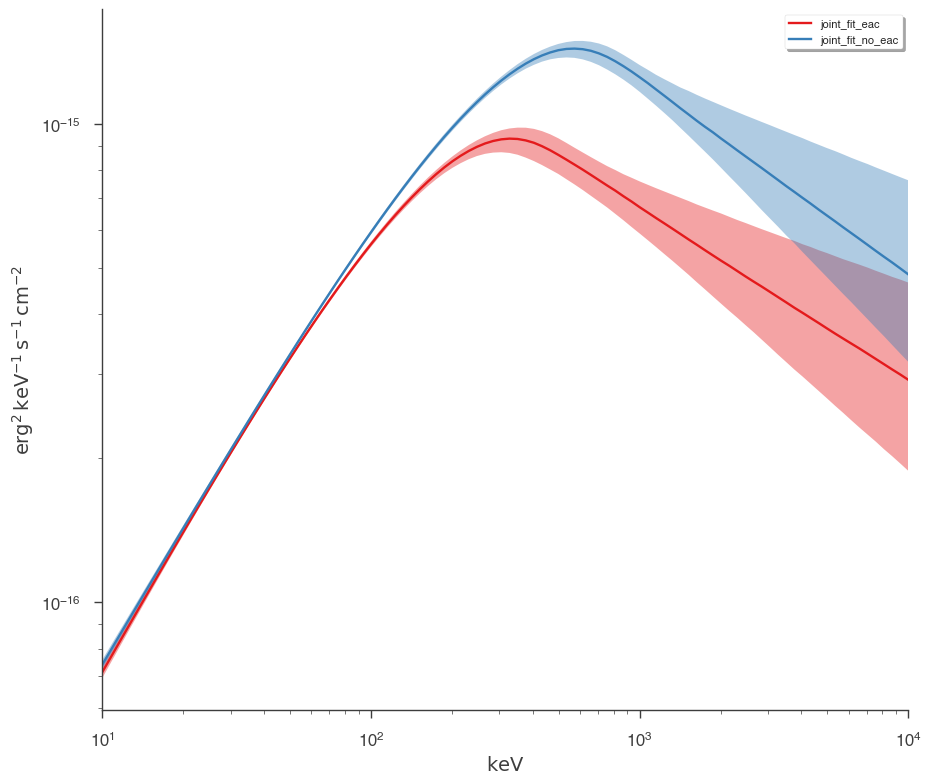

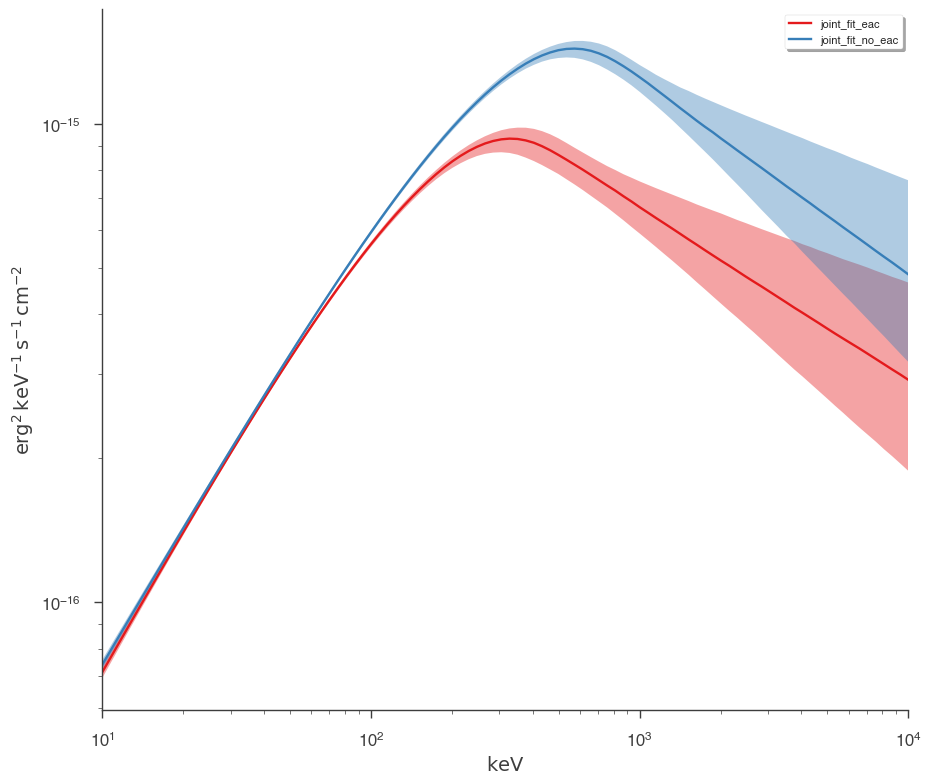

In [15]:
plot_spectra(
    jl_eac.results,
    jl_no_eac.results,
    fit_cmap="Set1",
    contour_cmap="Set1",
    flux_unit="erg2/(keV s cm2)",
    equal_tailed=True,
)

We can easily see that the models are different